In [1080]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [1081]:
df = pd.read_csv("feeData.csv")
df.describe()

,Year,Value
count,3548.000000,3548.000000
mean,2016.923337,13027.720124
std,2.553910,8734.568645
min,2013.000000,1225.000000
25%,2015.000000,7756.750000
50%,2017.000000,10203.500000
75%,2019.000000,14830.750000
max,2021.000000,49152.000000


In [1082]:
df.columns

Index(['Year', 'State', 'Type', 'Length', 'Expense', 'Value'], dtype='object')

In [1083]:
df.columns

Index(['Year', 'State', 'Type', 'Length', 'Expense', 'Value'], dtype='object')

In [1084]:
df.head()
df["State"].unique()
StatesEncoder = {
    'Alabama':0 , 'Alaska':1, 'Arizona':2, 'Arkansas':3, 'California':4,
       'Colorado':5, 'Connecticut':6, 'Delaware':7, 'District of Columbia':8,
       'Florida':9, 'Georgia':10, 'Hawaii': 11, 'Idaho':12, 'Illinois':13, 'Indiana':14,
       'Iowa':15, 'Kansas':16, 'Kentucky':17, 'Louisiana':18, 'Maine':19, 'Maryland':20,
       'Massachusetts':21, 'Michigan':22, 'Minnesota':23, 'Mississippi':24,
       'Missouri':25, 'Montana':26, 'Nebraska':27, 'Nevada':28, 'New Hampshire':29,
       'New Jersey':30, 'New Mexico':31, 'New York':32, 'North Carolina':33,
       'North Dakota':34, 'Ohio':35, 'Oklahoma':36, 'Oregon':37, 'Pennsylvania':38,
       'Rhode Island':39, 'South Carolina':40, 'South Dakota':41, 'Tennessee':42,
       'Texas':43, 'Utah':44, 'Vermont':45, 'Virginia':46, 'Washington':47,
       'West Virginia':48, 'Wisconsin':49, 'Wyoming':50
}


In [1085]:
def changeState(state) ->float():
    state = StatesEncoder[state]
    if state == None:
        raise Exception("Bitch what is this state?")
    return float(state)

In [1086]:
df["State"] = df["State"].apply(changeState)


In [1087]:
df.head()

,Year,State,Type,Length,Expense,Value
0,2013,0.0,Private,4-year,Fees/Tuition,13983
1,2013,0.0,Private,4-year,Room/Board,8503
2,2013,0.0,Public In-State,2-year,Fees/Tuition,4048
3,2013,0.0,Public In-State,4-year,Fees/Tuition,8073
4,2013,0.0,Public In-State,4-year,Room/Board,8473


In [1088]:
df["Type"].unique()
typeEncoder = {
    'Private':1, 'Public In-State':2, 'Public Out-of-State':3
}

In [1089]:
def changeType(uniType) -> float():
    uniType = typeEncoder[uniType]
    return float(uniType)

In [1090]:
df["Type"] = df["Type"].apply(changeType)

In [1091]:
df.head()

,Year,State,Type,Length,Expense,Value
0,2013,0.0,1.0,4-year,Fees/Tuition,13983
1,2013,0.0,1.0,4-year,Room/Board,8503
2,2013,0.0,2.0,2-year,Fees/Tuition,4048
3,2013,0.0,2.0,4-year,Fees/Tuition,8073
4,2013,0.0,2.0,4-year,Room/Board,8473


In [1092]:
df["Length"].unique()
yearEncoder = {
    '4-year':4, '2-year':2
}

In [1093]:
def changeLength(years) -> float():
    years = yearEncoder[years]
    return float(years)

In [1094]:
df["Length"] = df["Length"].apply(changeLength)

In [1095]:
df.head()

,Year,State,Type,Length,Expense,Value
0,2013,0.0,1.0,4.0,Fees/Tuition,13983
1,2013,0.0,1.0,4.0,Room/Board,8503
2,2013,0.0,2.0,2.0,Fees/Tuition,4048
3,2013,0.0,2.0,4.0,Fees/Tuition,8073
4,2013,0.0,2.0,4.0,Room/Board,8473


In [1096]:
df["Expense"].unique()
expenseEncoder = {
    'Fees/Tuition':1
    , 'Room/Board':2
}

In [1097]:
def changeExpense(expenseType) -> float():
    expenseType = expenseEncoder[expenseType]
    return float(expenseType)

In [1098]:
df["Expense"] = df["Expense"].apply(changeExpense)

In [1099]:
df.head()

,Year,State,Type,Length,Expense,Value
0,2013,0.0,1.0,4.0,1.0,13983
1,2013,0.0,1.0,4.0,2.0,8503
2,2013,0.0,2.0,2.0,1.0,4048
3,2013,0.0,2.0,4.0,1.0,8073
4,2013,0.0,2.0,4.0,2.0,8473


In [1100]:
df.describe()

,Year,State,Type,Length,Expense,Value
count,3548.000000,3548.000000,3548.000000,3548.000000,3548.000000,3548.000000
mean,2016.923337,25.180665,2.124577,3.506201,1.380496,13027.720124
std,2.553910,14.618571,0.787006,0.862537,0.485577,8734.568645
min,2013.000000,0.000000,1.000000,2.000000,1.000000,1225.000000
25%,2015.000000,13.000000,1.000000,4.000000,1.000000,7756.750000
50%,2017.000000,25.000000,2.000000,4.000000,1.000000,10203.500000
75%,2019.000000,38.000000,3.000000,4.000000,2.000000,14830.750000
max,2021.000000,50.000000,3.000000,4.000000,2.000000,49152.000000


In [1101]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot(df):
    # Extract input and target features
    X = df[['Year', 'State', 'Type', 'Length', 'Expense']]
    y = df['Value']

    # Convert categorical features to numerical
    X = pd.get_dummies(X, columns=['State', 'Type'])

    # Plot pairwise relationships between input features and target feature
    sns.pairplot(pd.concat([X, y], axis=1), x_vars=X.columns, y_vars=['Value'])

    plt.show()


In [1102]:
X = df.drop(columns=["Value"])
y = df["Value"]

In [1103]:
y.describe()



count     3548.000000
mean     13027.720124
std       8734.568645
min       1225.000000
25%       7756.750000
50%      10203.500000
75%      14830.750000
max      49152.000000
Name: Value, dtype: float64

In [1104]:
def lowerValue(value) ->float():
    return (value/10000)

In [1105]:
y=y.apply(lowerValue)


In [1106]:
y.describe()

count    3548.000000
mean        1.302772
std         0.873457
min         0.122500
25%         0.775675
50%         1.020350
75%         1.483075
max         4.915200
Name: Value, dtype: float64

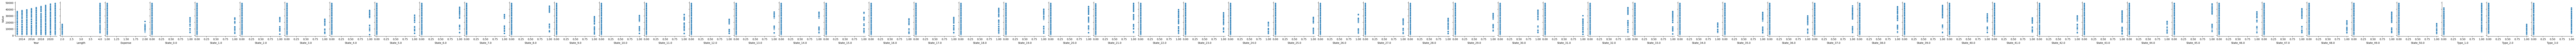

In [1107]:
plot(df)

In [1108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
y_train.describe()

count    3015.000000
mean        1.309315
std         0.881868
min         0.122500
25%         0.774300
50%         1.022000
75%         1.506950
max         4.915200
Name: Value, dtype: float64

In [1109]:
model = LinearRegression()

In [1110]:
X_train.columns

Index(['Year', 'State', 'Type', 'Length', 'Expense'], dtype='object')

In [1111]:
model = model.fit(X_train, y_train)

In [1112]:
def makePred() -> None:
    #'Year', 'State', 'Type', 'Length', 'Expense'
    state = input("Please enter state: ")
    year = int(input("Please enter year of study: "))
    length = int(input("Please enter length of study 2 or 4"))
    type = input("Please enter Private, Public In-State, Public Out-of-State: ")
    expense = input("Please enter 'Fees/Tuition' or 'Room/Board': ")
    expense =expenseEncoder[expense]
    state = StatesEncoder[state]
    type = typeEncoder[type]

    pred = model.predict([[year, state, type, length, expense]])
    print(pred*1000)
    

In [1113]:
#makePred()

In [1114]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test)
predictions
acc_score = mean_squared_error(y_test, predictions)
acc_score


0.39885855032503476